# Chapter: Input-Output Modeling - Part 2: 


## Topic: Modeling of system with disturbance non-stationarity via ARIMAX 

In [3]:
# import packages 
import matplotlib.pyplot as plt, numpy as np, control
from sklearn.preprocessing import StandardScaler
from sippy import system_identification as SysID
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.ticker import MaxNLocator

# package settings
plt.rcParams.update({'font.size': 14})
assert(control.__version__ < '0.9'), "To avoid errors, downgrade the control package to a version < 0.9.0. See https://github.com/CPCLAB-UNIPI/SIPPY/issues/48 for details."

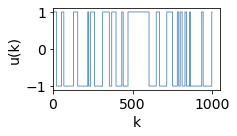

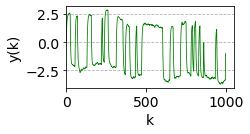

In [4]:
# read data and plot
data = np.loadtxt('ARIMAX_illustrate_SNR15.csv', delimiter=',')
u = data[:,0, None]; y = data[:,1, None]

# plots
plt.figure(figsize=(3,1.5))
plt.plot(u, 'steelblue', linewidth=0.8, drawstyle='steps')
plt.ylabel('u(k)'), plt.xlabel('k'), plt.xlim(0)

plt.figure(figsize=(3,1.5))
plt.plot(y, 'g', linewidth=0.8)
plt.ylabel('y(k)'), plt.xlabel('k'), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')
plt.show()

In [5]:
# center data before model fitting
u_scaler = StandardScaler(with_std=False); u_centered = u_scaler.fit_transform(u) 
y_scaler = StandardScaler(with_std=False); y_centered = y_scaler.fit_transform(y) 

In [6]:
#%% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                Fit OE model and check residual non-stationarity
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [7]:
# fit OE model
OEmodel = SysID(y_centered, u_centered, 'OE', OE_orders=[1,1,0])
print(OEmodel.G)


  0.715
----------
z - 0.6891

dt = 1.0



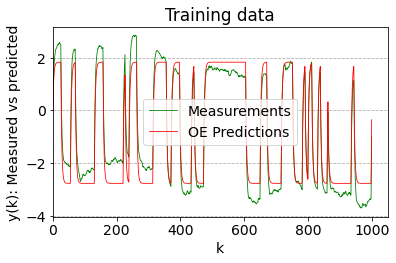

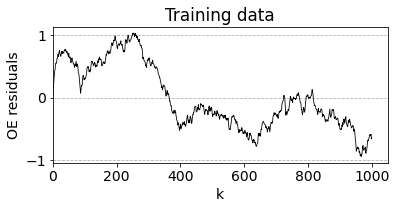

In [8]:
# get model predictions and residuals on training dataset
y_predicted_OE = y_scaler.inverse_transform(np.transpose(OEmodel.Yid))
OEresiduals = y - y_predicted_OE

plt.figure(figsize=(6,3.5)), plt.plot(y, 'g', linewidth=0.8, label='Measurements'), plt.plot(y_predicted_OE, 'r', linewidth=0.8, label='OE Predictions')
plt.title('Training data'), plt.ylabel('y(k): Measured vs predicted'), plt.xlabel('k'), plt.legend(), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')

plt.figure(figsize=(6,2.5)), plt.plot(OEresiduals, 'black', linewidth=0.8)
plt.title('Training data'), plt.ylabel('OE residuals'), plt.xlabel('k'), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')
plt.show()

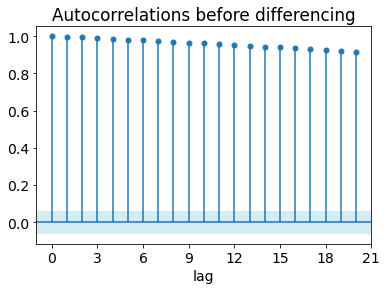

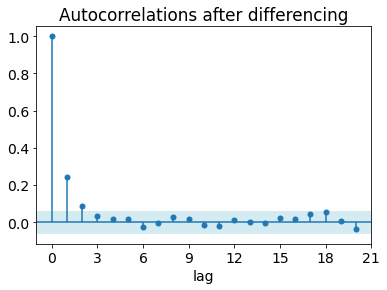

In [11]:
# ACF of OE residuals
conf_int = 1.96/np.sqrt(len(OEresiduals))

plot_acf(OEresiduals, lags= 20, alpha=None, title='')
plt.gca().axhspan(-conf_int, conf_int, facecolor='lightblue', alpha=0.5) # shaded confidence interval
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # integer xtick labels
plt.xlabel('lag'), plt.title('Autocorrelations before differencing')
plt.show()

#%% ACF of 1-degree differenced OE residuals
plot_acf(np.diff(OEresiduals, axis=0), lags= 20, alpha=None, title='')
plt.gca().axhspan(-conf_int, conf_int, facecolor='lightblue', alpha=0.5) # shaded confidence interval
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # integer xtick labels
plt.xlabel('lag'), plt.title('Autocorrelations after differencing')
plt.show()

In [12]:
#%% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                         Fit ARIMAX model 
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

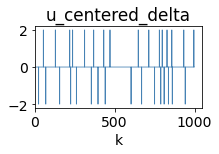

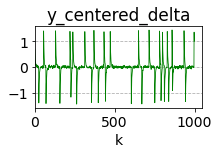

In [14]:
# difference I/O data once
u_centered_delta = np.diff(u_centered, axis=0)
y_centered_delta = np.diff(y_centered, axis=0)

# plots
plt.figure(figsize=(3,1.5))
plt.plot(u_centered_delta, 'steelblue', linewidth=0.8, drawstyle='steps')
plt.title('u_centered_delta'), plt.xlabel('k'), plt.xlim(0)

plt.figure(figsize=(3,1.5))
plt.plot(y_centered_delta, 'g', linewidth=0.8)
plt.title('y_centered_delta'), plt.xlabel('k'), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')
plt.show()

In [16]:
# fit ARMAX model on differenced input-output data
ARMAXmodel = SysID(y_centered_delta, u_centered_delta, 'ARMAX', ARMAX_orders=[1,1,0,0])
print(ARMAXmodel.G)
print(ARMAXmodel.H)


  0.6986
----------
z - 0.6945

dt = 1.0


    z
----------
z - 0.6945

dt = 1.0

